## Regression Analysis on Advertising Data
Data source : [An introduction to Statistical Learning book Chapter 3](http://www-bcf.usc.edu/~gareth/ISL/)

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn as sk 

In [3]:
# read data into a DataFrame
df = pd.read_csv('Advertising.csv', index_col=0)
df.head(10)

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
6,8.7,48.9,75.0,7.2
7,57.5,32.8,23.5,11.8
8,120.2,19.6,11.6,13.2
9,8.6,2.1,1.0,4.8
10,199.8,2.6,21.2,10.6


### Features:
* TV: advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
* Radio: advertising dollars spent on Radio
* Newspaper: advertising dollars spent on Newspaper
### response:
* Sales: sales of a single product in a given market (in thousands of widgets)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 7.8 KB


## Let's analyse the data first

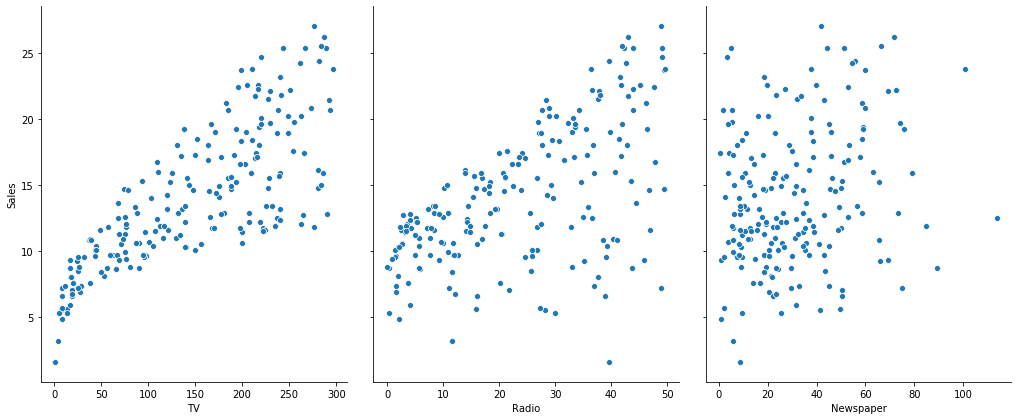

In [5]:
sns.pairplot(df, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', size=6, aspect=0.8)

# 1. Simple Linear Regression with One Variable 

In [6]:
X = df[['TV']].values
y = df['Sales'].values

### Split the dataset into Training and Testing set

In [7]:
#from sklearn.cross_validation import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

### Fit the model

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
model=LinearRegression()

In [10]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Let's plot the regression line

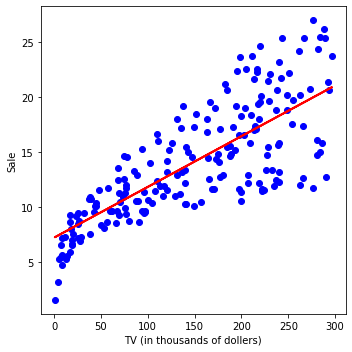

In [11]:
plt.subplots(figsize=(5,5))
plt.scatter(X, y, c='blue')
plt.plot(X, model.predict(X), color='red', linewidth=2) 
plt.xlabel('TV (in thousands of dollers)')
plt.ylabel('Sale')
plt.tight_layout()
plt.show()

### What is the accuracy the model 

In [12]:
print ('Residual sum of squares Train: %.2f' % np.mean((model.predict(X_train)- y_train) ** 2))
print ('Residual sum of squares Test: %.2f' % np.mean((model.predict(X_test)- y_test) ** 2))

Residual sum of squares Train: 11.13
Residual sum of squares Test: 8.73


# 2. Multiple Linear Regression 

In [13]:
X = df[['TV','Radio','Newspaper']].values
y = df['Sales'].values

### Split the dataset into Training and Testing set

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Fit the model

In [15]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### What is the acuracy of the model

In [16]:
print ('Residual sum of squares Train: %.2f' % np.mean((model.predict(X_train)- y_train) ** 2))
print ('Residual sum of squares Test: %.2f' % np.mean((model.predict(X_test)- y_test) ** 2))

Residual sum of squares Train: 2.49
Residual sum of squares Test: 3.69


# 3. Polynomial Regression with One Variable 

In [30]:
X = df[['TV']].values
y = df['Sales'].values

### Split the dataset into Training and Testing set

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [32]:
from sklearn.preprocessing import PolynomialFeatures

In [33]:
def PolynomialRegression(degree):
    
    X = X_train
    y = y_train
    
    # Simple linear regression first
    regressor = LinearRegression()
    regressor.fit(X, y)
    xx = np.linspace(0, 300, 200)
    yy = regressor.predict(xx.reshape(xx.shape[0], 1))
    
    quadratic_featurizer = PolynomialFeatures(degree)
    X_quadratic = quadratic_featurizer.fit_transform(X)
    
    regressor_quadratic = LinearRegression()
    regressor_quadratic.fit(X_quadratic, y)
    xx_quadratic = quadratic_featurizer.transform(xx.reshape(xx.shape[0], 1))
    
    print ('Residual sum of squares on Training: %.2f' % np.mean(( regressor_quadratic.predict(X_quadratic)- y) ** 2))
    
    plt.plot(xx, yy)
    plt.plot(xx, regressor_quadratic.predict(xx_quadratic), c='r',linestyle='--',linewidth=3)
    plt.title('Scale Prediction')
    plt.xlabel('TV (in thousands of dollers)')
    plt.ylabel('Scale')
    plt.grid(True)
    plt.scatter(X,y)
    plt.show()

    
    X_quadratic_test=quadratic_featurizer.fit_transform(X_test)
    print ('Residual sum of squares TEST: %.2f' % np.mean((regressor_quadratic.predict(X_quadratic_test)- y_test) ** 2))

In [34]:
from IPython.html import widgets
from IPython.html.widgets import interact
i = interact(PolynomialRegression, degree=(0,30))

interactive(children=(IntSlider(value=15, description='degree', max=30), Output()), _dom_classes=('widget-inte…

# 4. Polynomial Regression with Multiple Variables

In [22]:
X = df[['TV','Radio']].values
y = df['Sales'].values

### Split the dataset into Training and Testing set

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [24]:
from sklearn.preprocessing import PolynomialFeatures

In [35]:
def PolynomialRegression(degree):
    
    
    quadratic_features = PolynomialFeatures(degree)
    X_quadratic=quadratic_features.fit_transform(X_train)
    
    model=LinearRegression()
    model.fit(X_quadratic,y_train)
    
    print ('Residual sum of squares: %.2f' % np.mean((model.predict(X_quadratic)- y_train) ** 2))
    
    X_quadratic_test=quadratic_features.fit_transform(X_test)
    print ('Residual sum of squares TEST: %.2f' % np.mean((model.predict(X_quadratic_test)- y_test) ** 2))

In [36]:
from IPython.html import widgets
from IPython.html.widgets import interact
i = interact(PolynomialRegression, degree=(0,30))

interactive(children=(IntSlider(value=15, description='degree', max=30), Output()), _dom_classes=('widget-inte…